In [80]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [81]:
df = pd.read_csv('water_dataX.csv',encoding='ISO-8859-1',low_memory=False)

In [82]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [83]:
# analysing the dataset

df.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [85]:
df.shape

(1991, 12)

In [86]:
# managing the null values

df.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [87]:
df.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [88]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [89]:
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [90]:
df.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [91]:
#filling the null values

df['Temp'].fillna(df['Temp'].mean(),inplace=True)
df['D.O. (mg/l)'].fillna(df['D.O. (mg/l)'].mean(),inplace=True)
df['PH'].fillna(df['PH'].mean(),inplace=True)
df['CONDUCTIVITY (µmhos/cm)'].fillna(df['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
df['B.O.D. (mg/l)'].fillna(df['B.O.D. (mg/l)'].mean(),inplace=True)
df['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(df['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
df['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(df['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [92]:
df.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [93]:
df=df.rename(columns = {'D.O. (mg/l)': 'do'})
df=df.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
df=df.rename(columns = {'B.O.D. (mg/l)': 'bod'})
df=df.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)': 'na'})
df=df.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
df=df.rename(columns = {'STATION CODE': 'station'})
df=df.rename(columns = {'LOCATIONS': 'location'})
df=df.rename(columns = {'STATE': 'state'})
df=df.rename(columns = {'PH': 'ph'})

In [94]:
num_df=df.select_dtypes(exclude="object")
num_df

,Temp,do,ph,co,bod,na,tc,year
0,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...
1986,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


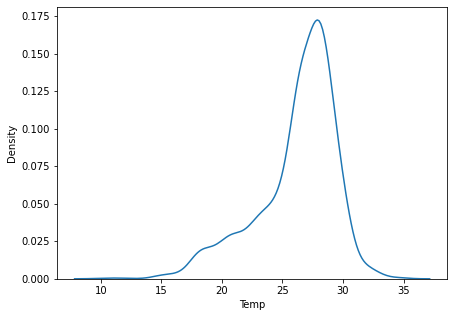

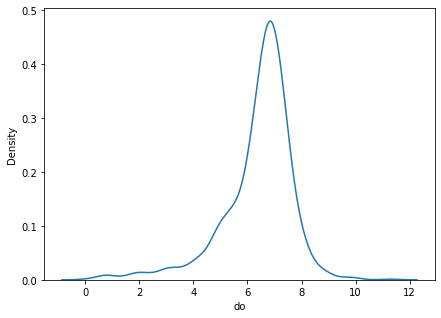

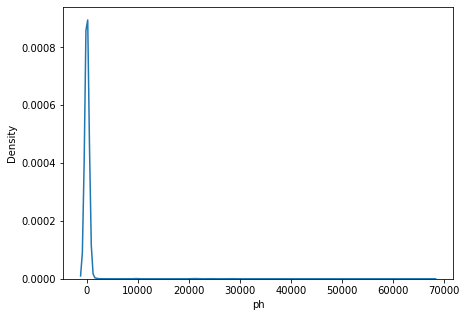

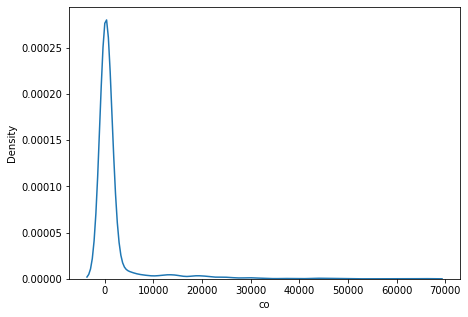

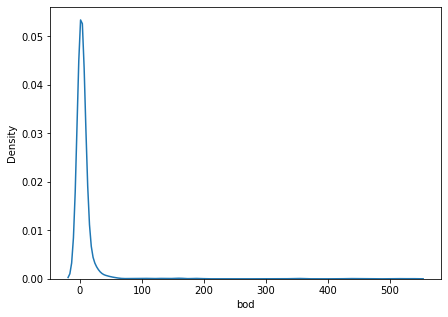

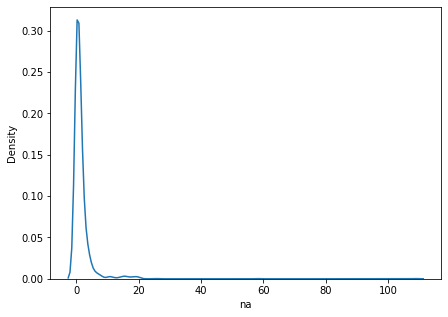

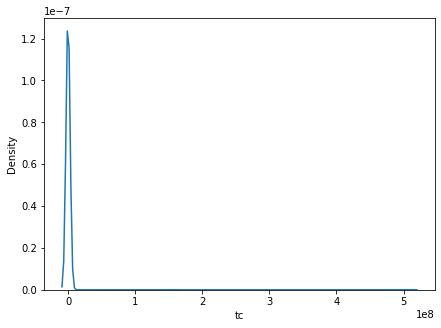

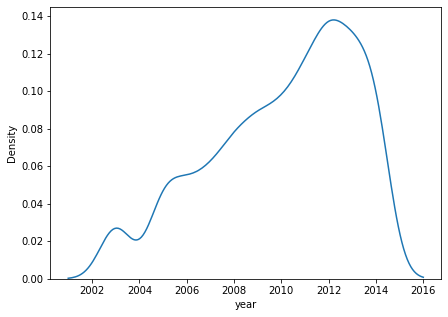

In [95]:
def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)

plot_kde(num_df)

In [96]:
#z score normalization

from scipy.stats import zscore
num_df_scaled=zscore(num_df,axis=0)
num_df_scaled

,Temp,do,ph,co,bod,na,tc,year
0,1.335692,0.232467,-0.055791,-0.287073,0.000000,-0.395468,-0.038810,1.296170
1,1.092296,-0.523859,-0.055951,-0.289611,-0.169917,-0.369503,-0.038202,1.296170
2,1.001022,-0.070063,-0.056111,-0.291424,-0.180235,-0.395468,-0.038424,1.296170
3,1.061871,-0.448226,-0.056111,-0.312273,-0.108004,-0.291608,-0.038198,1.296170
4,1.001022,-0.448226,-0.055898,-0.308828,-0.173356,-0.317573,-0.038412,1.296170
...,...,...,...,...,...,...,...,...
1986,0.000000,1.140057,0.333875,-0.322570,-0.145840,-0.286934,-0.038797,-2.302641
1987,0.848900,0.837527,0.252261,-0.322733,-0.149279,-0.381187,-0.038789,-2.302641
1988,0.544655,0.913159,-0.007516,-0.322752,-0.197433,0.000000,-0.038770,-2.302641
1989,0.544655,0.988792,-0.011250,-0.322697,-0.193994,0.000000,-0.038771,-2.302641


In [97]:
#outlier detection

def detect_outliers(df_norm):
    indices = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[: ,index]
        ot = df_norm[col_index > 3]
        ot_index = ot.index
        indices.extend(ot_index)
    return indices

indices = detect_outliers(num_df_scaled)
print("Number of outliers using Z-Score method-",len(indices))
num_df.iloc[indices, :]

Number of outliers using Z-Score method- 136


,Temp,do,ph,co,bod,na,tc,year
739,28.0,11.1,7.60,131.0,3.60,1.623079,32.0,2012
743,28.0,11.4,7.20,128.0,1.00,1.623079,20.0,2012
1914,28.0,7.5,21331.00,3.6,11.70,1.623079,14109.0,2003
1921,28.0,7.5,67115.00,5.0,5.50,1.623079,3425.0,2003
1922,27.0,4.0,9948.00,0.4,513.50,1.623079,35.0,2003
...,...,...,...,...,...,...,...,...
1808,14.0,6.2,7.88,540.7,9.75,17.387000,1100.0,2005
1883,16.0,6.2,7.63,423.3,7.00,14.013000,43.0,2005
172,24.3,0.9,7.60,2039.0,104.50,0.900000,511090873.0,2014
430,26.8,3.4,7.80,2577.0,164.90,1.500000,160405392.0,2013


In [98]:
#outlier removal

df.drop(indices, axis=0, inplace=True)
df.shape

(1865, 11)

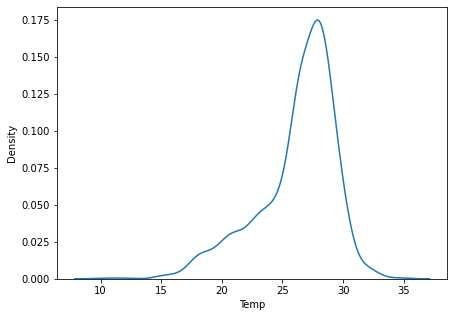

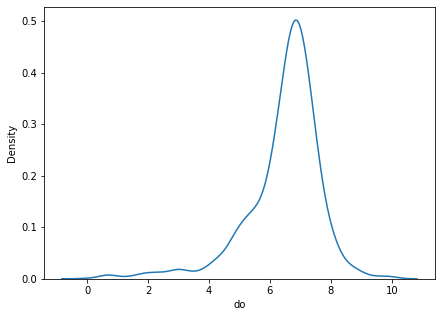

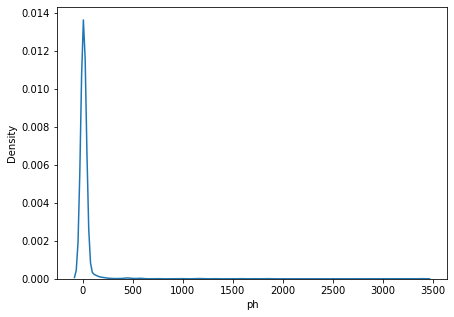

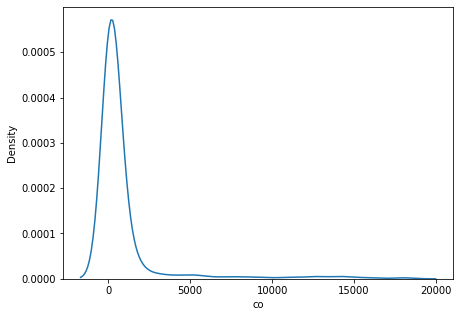

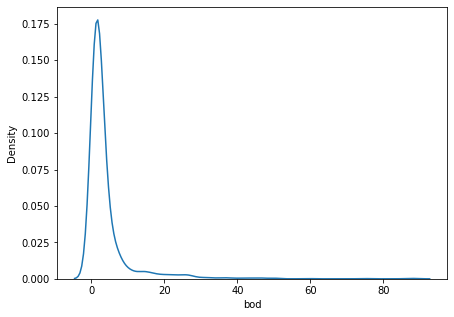

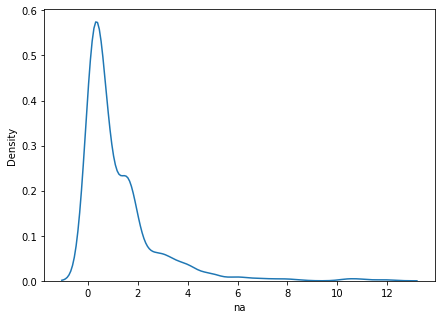

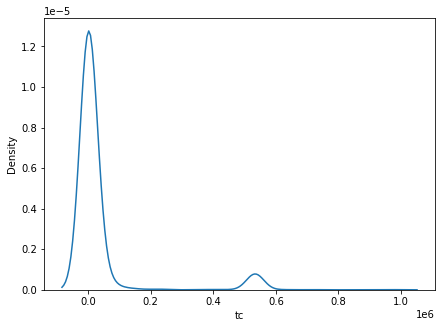

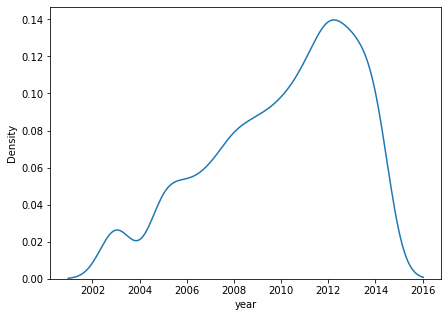

In [99]:
num_df=df.select_dtypes(exclude='object')
plot_kde(num_df)

In [100]:
#WQI calculation parameters


'''
RECOMMENDED STANDARD VALUE FOR WQI (SI)
Dissolved oxygen, mg/L 10

pH 8.5

Conductivity, µS/cm 1000

Biological oxygen demand, mg/L 5

Nitrate, mg/L 45

Total coliform/100 mL 1000



UNIT WEIGHTS FOR WQI (WI)
Dissolved Oxygen 0.2213

pH 0.2604

Conductivity 0.0022

Biological Oxygen Demand 0.4426

Nitrate 0.0492

Total Coliform 0.0022


IDEAL VALUE OF PARAMETERS (Videal)
Dissolved Oxygen 14.6

pH 7.0

Conductivity 0

Biological Oxygen Demand 0

Nitrate 0

Total Coliform 0

'''

'\nRECOMMENDED STANDARD VALUE FOR WQI (SI)\nDissolved oxygen, mg/L 10\n\npH 8.5\n\nConductivity, µS/cm 1000\n\nBiological oxygen demand, mg/L 5\n\nNitrate, mg/L 45\n\nTotal coliform/100 mL 1000\n\n\n\nUNIT WEIGHTS FOR WQI (WI)\nDissolved Oxygen 0.2213\n\npH 0.2604\n\nConductivity 0.0022\n\nBiological Oxygen Demand 0.4426\n\nNitrate 0.0492\n\nTotal Coliform 0.0022\n\n\nIDEAL VALUE OF PARAMETERS (Videal)\nDissolved Oxygen 14.6\n\npH 7.0\n\nConductivity 0\n\nBiological Oxygen Demand 0\n\nNitrate 0\n\nTotal Coliform 0\n\n'

In [101]:
#year and temp not required for WQI calc so dropping those 2 columns
num_wqi_df=num_df.drop(["Temp","year"],axis=1)
num_wqi_df

,do,ph,co,bod,na,tc
0,6.7,7.5,203.0,6.940049,0.100000,27.0
1,5.7,7.2,189.0,2.000000,0.200000,8391.0
2,6.3,6.9,179.0,1.700000,0.100000,5330.0
3,5.8,6.9,64.0,3.800000,0.500000,8443.0
4,5.8,7.3,83.0,1.900000,0.400000,5500.0
...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0
1987,7.5,585.0,6.3,2.600000,0.155000,315.0
1988,7.6,98.0,6.2,1.200000,1.623079,570.0
1989,7.7,91.0,6.5,1.300000,1.623079,562.0


In [102]:
#weight vectors for WQI calculation

wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0])

def calc_wqi_row(row):
    wqi_sample = 0
    num_col = 6
    for index in range(num_col):
        v_index = row[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [103]:
def calc_wqi_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi_row(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [104]:
wqi_arr = calc_wqi_df(num_wqi_df)

#convert to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df = df.reset_index()

In [105]:
df_wqi = pd.concat([df, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(1865, 12)

In [106]:
df_wqi

,station,location,state,Temp,do,ph,co,bod,na,tc,year,WQI
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,108.180715
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,65.902206
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,54.465531
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,76.163459
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,65.634446
...,...,...,...,...,...,...,...,...,...,...,...,...
1860,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,12746.395885
1861,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,10091.340007
1862,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,1624.362708
1863,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,1503.245127


In [107]:
# Removing the samples with negative WQI
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (4 if (x <= 25)
                                        else(3 if (26<=x<=50)
                                        else(2 if (51<=x<=75)
                                        else(2 if (76<=x<=100)
                                        else 0)))))
df_wqi.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year,WQI,WQI clf
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,108.180715,0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,65.902206,2
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,54.465531,2
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,76.163459,2
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,65.634446,2


In [108]:
df_wqi.shape

(1861, 13)

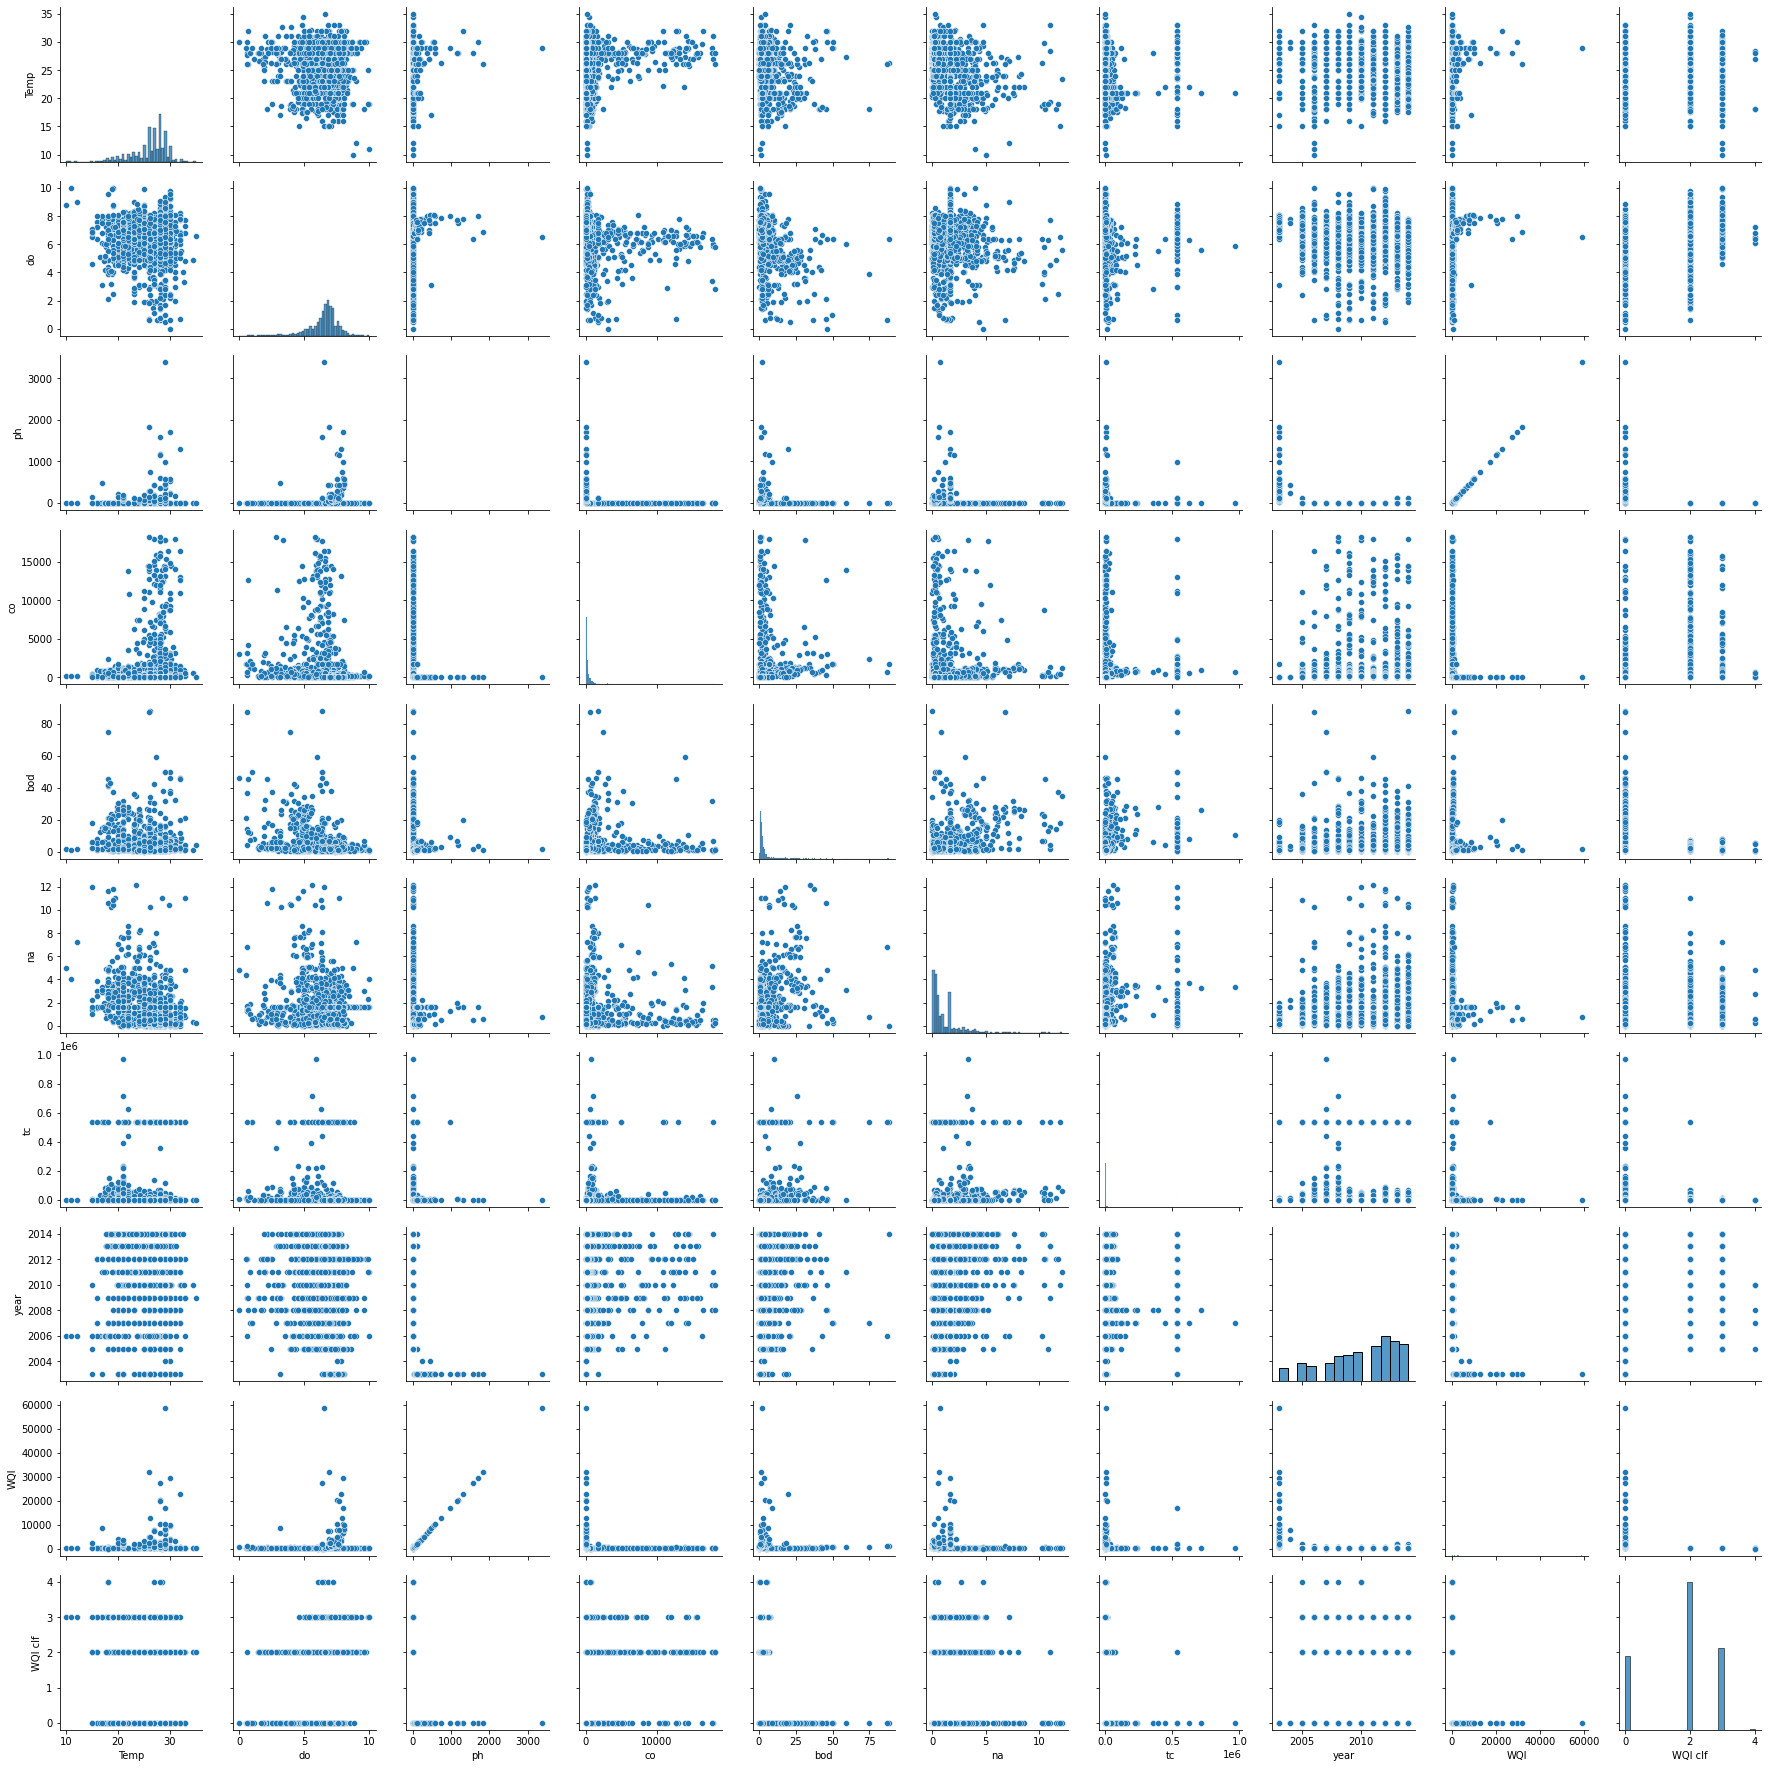

In [109]:
#correlations between variables

sns.pairplot(df_wqi)

<AxesSubplot:xlabel='bod', ylabel='do'>

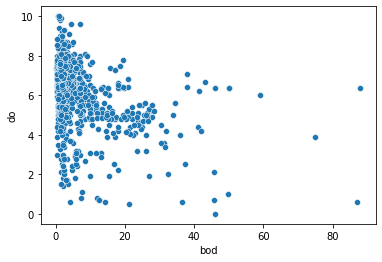

In [110]:
sns.scatterplot(x ='bod',y='do',data=df_wqi)

<AxesSubplot:xlabel='Temp', ylabel='na'>

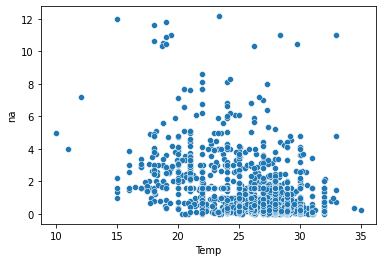

In [111]:
sns.scatterplot(x ='Temp',y='na',data=df_wqi)

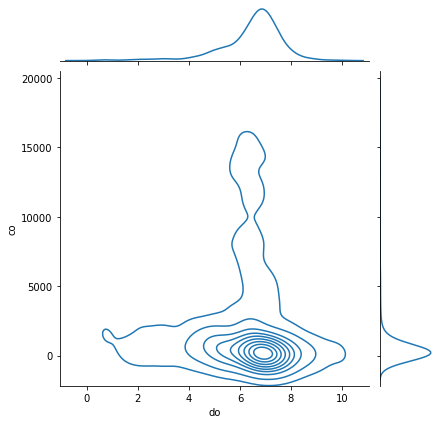

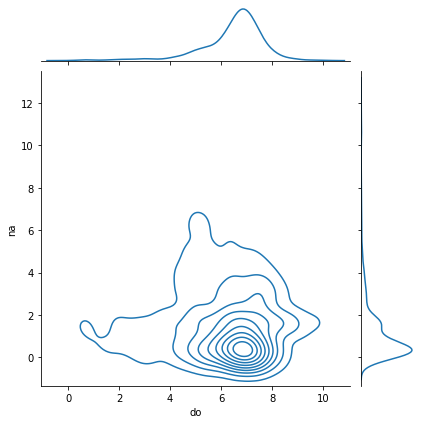

In [112]:
sns.jointplot(x="do",y="co", data=df_wqi, kind = 'kde')
sns.jointplot(x="do",y="na", data=df_wqi, kind = 'kde')

C:\Users\yashm\AppData\Local\Temp\ipykernel_4788\2057866096.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_wqi.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'do'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'co'}>,
        <AxesSubplot:title={'center':'bod'}>,
        <AxesSubplot:title={'center':'na'}>],
       [<AxesSubplot:title={'center':'tc'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'WQI'}>],
       [<AxesSubplot:title={'center':'WQI clf'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

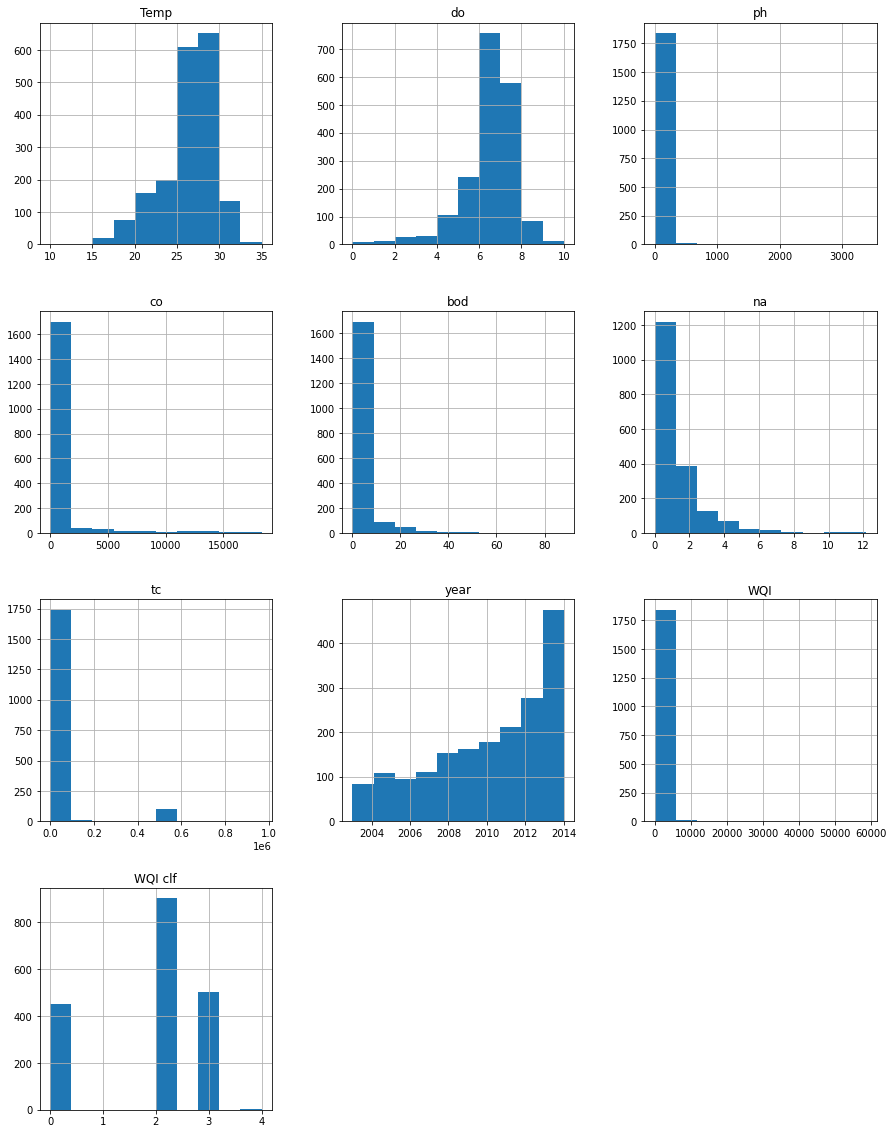

In [113]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_wqi.hist(ax = ax)

<AxesSubplot:title={'center':'na'}, xlabel='year'>

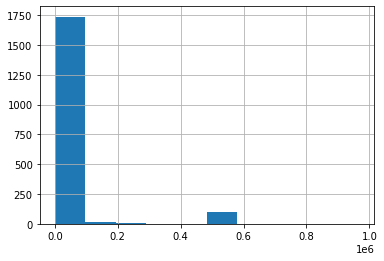

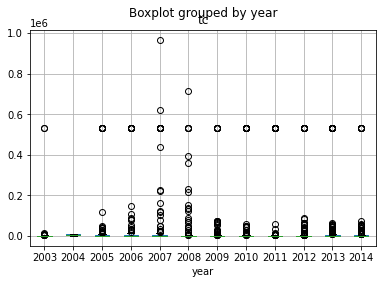

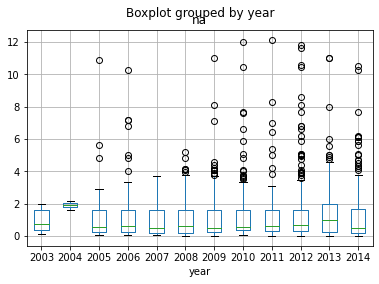

In [114]:
df_wqi['tc'].hist(bins=10)
df_wqi.boxplot(column='tc',by='year')
df_wqi.boxplot(column='na',by='year')

<AxesSubplot:xlabel='year'>

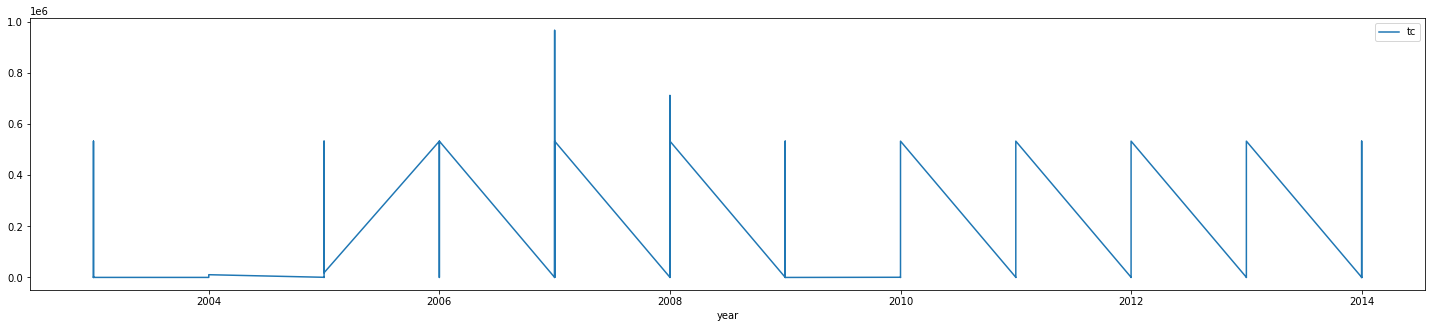

In [115]:
fig = plt.figure(figsize = (25,5))
ax=fig.gca()
df_wqi.plot('year','tc',ax=ax)

In [116]:
#split data into dependent and independent columns

df_wqi.corr()

,Temp,do,ph,co,bod,na,tc,year,WQI,WQI clf
Temp,1.000000,-0.014818,0.052680,0.110061,-0.192673,-0.424264,-0.065248,-0.001374,0.046405,0.151332
do,-0.014818,1.000000,0.072200,-0.154108,-0.410225,-0.165937,-0.048833,-0.051816,0.057124,0.321057
ph,0.052680,0.072200,1.000000,-0.039757,-0.001133,-0.007706,-0.005466,-0.260131,0.999374,-0.189444
co,0.110061,-0.154108,-0.039757,1.000000,0.106887,0.019154,0.045168,0.041946,-0.035457,-0.078073
bod,-0.192673,-0.410225,-0.001133,0.106887,1.000000,0.422582,0.287884,-0.006523,0.032075,-0.513983
na,-0.424264,-0.165937,-0.007706,0.019154,0.422582,1.000000,0.131666,0.070831,0.006495,-0.322591
tc,-0.065248,-0.048833,-0.005466,0.045168,0.287884,0.131666,1.000000,-0.026962,0.015556,-0.441640
year,-0.001374,-0.051816,-0.260131,0.041946,-0.006523,0.070831,-0.026962,1.000000,-0.260418,0.177104
WQI,0.046405,0.057124,0.999374,-0.035457,0.032075,0.006495,0.015556,-0.260418,1.000000,-0.210498
WQI clf,0.151332,0.321057,-0.189444,-0.078073,-0.513983,-0.322591,-0.441640,0.177104,-0.210498,1.000000


<AxesSubplot:>

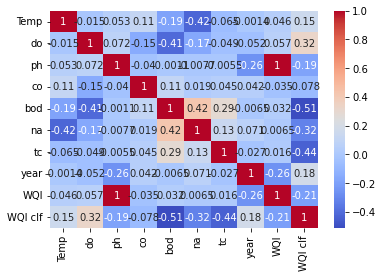

In [117]:
sns.heatmap(df_wqi.corr(), annot = True, fmt='.2g',cmap='coolwarm')

In [118]:
#na dep on temp, bod dependent on do, do dependent on co and na
#taking threshold as 0.19 for dependent col


dependent_cols=df_wqi[['na','bod','do','WQI']]
independent_cols=df_wqi[['Temp','ph','co','tc','year']]

In [119]:
dependent_cols

,na,bod,do,WQI
0,0.100000,6.940049,6.7,108.180715
1,0.200000,2.000000,5.7,65.902206
2,0.100000,1.700000,6.3,54.465531
3,0.500000,3.800000,5.8,76.163459
4,0.400000,1.900000,5.8,65.634446
...,...,...,...,...
1860,0.518000,2.700000,7.9,12746.395885
1861,0.155000,2.600000,7.5,10091.340007
1862,1.623079,1.200000,7.6,1624.362708
1863,1.623079,1.300000,7.7,1503.245127


In [120]:
independent_cols

,Temp,ph,co,tc,year
0,30.600000,7.5,203.0,27.0,2014
1,29.800000,7.2,189.0,8391.0,2014
2,29.500000,6.9,179.0,5330.0,2014
3,29.700000,6.9,64.0,8443.0,2014
4,29.500000,7.3,83.0,5500.0,2014
...,...,...,...,...,...
1860,26.209814,738.0,7.2,202.0,2003
1861,29.000000,585.0,6.3,315.0,2003
1862,28.000000,98.0,6.2,570.0,2003
1863,28.000000,91.0,6.5,562.0,2003


In [126]:
#Feature scaling using standard scaler and split data into train and test


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X=df_wqi.loc[:,"Temp":"year"]
Y=df_wqi.loc[:,"WQI clf"]
scaled_X=scaler.fit_transform(X)
scaled_X

array([[ 1.35905617,  0.18765144, -0.11326075, ..., -0.71254332,
        -0.28692216,  1.29290523],
       [ 1.11115941, -0.61500083, -0.11564553, ..., -0.6487574 ,
        -0.22058644,  1.29290523],
       [ 1.01819813, -0.13340947, -0.11803031, ..., -0.71254332,
        -0.24486354,  1.29290523],
       ...,
       [ 0.55339171,  0.91003848,  0.60614709, ...,  0.25896647,
        -0.28261557, -2.31738845],
       [ 0.55339171,  0.99030371,  0.55050228, ...,  0.25896647,
        -0.28267902, -2.31738845],
       [ 0.86326265,  0.91003848,  0.70153818, ...,  0.25896647,
        -0.28280592, -2.31738845]])

In [132]:
#LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrX_train, lrX_test, lry_train, lry_test = train_test_split(scaled_X,Y,test_size=0.25,random_state=4,shuffle=True)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(lrX_train,lry_train)
lryhat = LR.predict(lrX_test)
lryhat_prob = LR.predict_proba(lrX_test)
print(accuracy_score(lry_test, lryhat) )

0.6716738197424893


In [140]:
#KNN
from sklearn.model_selection import train_test_split
knnX_train, knnX_test, knny_train, knny_test = train_test_split(scaled_X,Y,test_size=0.25,random_state=4,shuffle=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(knnX_train,knny_train)
knnyhat = neigh.predict(knnX_test)

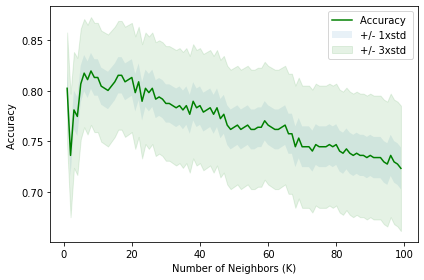

The best accuracy was  0.8197424892703863 with k= 8


In [138]:
#To predict best K
Ks=100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(knnX_train,knny_train)
    knnyhat=neigh.predict(knnX_test)
    mean_acc[n-1] = metrics.accuracy_score(knny_test, knnyhat)

    
    std_acc[n-1]=np.std(knnyhat==knny_test)/np.sqrt(knnyhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [141]:
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
accuracy_score(knny_test, knnyhat) 

0.8197424892703863

In [143]:
#RandomForest
rfX_train, rfX_test,rfy_train, rfy_test = train_test_split(scaled_X,Y,test_size=0.25,random_state=4,shuffle=True)
print ('Train set:', rfX_train.shape,  rfy_train.shape)
print ('Test set:', rfX_test.shape,  rfy_test.shape)
from sklearn.ensemble import RandomForestClassifier
import math
clss=RandomForestClassifier(n_estimators=100,random_state=0)
clss.fit(rfX_train,rfy_train)
rfyhat=clss.predict(rfX_test)

Train set: (1395, 8) (1395,)
Test set: (466, 8) (466,)


In [144]:
from sklearn.metrics import f1_score
accuracy_score(rfy_test, rfyhat) 

0.9313304721030042

In [146]:
#SVM
svmX_train, svmX_test,svmy_train, svmy_test = train_test_split(scaled_X,Y,test_size=0.25,random_state=4,shuffle=True)
print ('Train set:', svmX_train.shape,  svmy_train.shape)
print ('Test set:', svmX_test.shape,  svmy_test.shape)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(svmX_train, svmy_train) 
svmyhat = clf.predict(svmX_test)

Train set: (1395, 8) (1395,)
Test set: (466, 8) (466,)


In [147]:
from sklearn.metrics import f1_score
accuracy_score(svmy_test, svmyhat) 

0.8304721030042919

In [149]:
#Best model is Random Forest
#Model Evaluation
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(rfy_test,rfyhat))
print('MSE:',metrics.mean_squared_error(rfy_test,rfyhat))
print('RMSE:',np.sqrt(metrics.mean_squared_error(rfy_test,rfyhat)))

MAE: 0.11373390557939914
MSE: 0.2167381974248927
RMSE: 0.4655514981448268


In [150]:
#Save the model
import pickle
pickle.dump(regressor,open('wqi.pkl', 'wb'))
model = pickle.load(open('wqi.pkl','rb'))